# Bonus: Temperature Analysis I

In [2]:
import pandas as pd
from datetime import datetime as dt

In [3]:
# "tobs" is "temperature observations"
df = pd.read_csv('.\Resources\hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [4]:
# Convert the date column format from string to datetime
df['datetime'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   station   19550 non-null  object        
 1   date      19550 non-null  object        
 2   prcp      18103 non-null  float64       
 3   tobs      19550 non-null  int64         
 4   datetime  19550 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 763.8+ KB


In [5]:
df.head()

,station,date,prcp,tobs,datetime
0,USC00519397,2010-01-01,0.08,65,2010-01-01
1,USC00519397,2010-01-02,0.00,63,2010-01-02
2,USC00519397,2010-01-03,0.00,74,2010-01-03
3,USC00519397,2010-01-04,0.00,76,2010-01-04
4,USC00519397,2010-01-06,NaN,73,2010-01-06


In [6]:
# Set the date column as the DataFrame index
df.set_index('datetime', inplace=True)
df.head()

,station,date,prcp,tobs
datetime,,,,
2010-01-01,USC00519397,2010-01-01,0.08,65
2010-01-02,USC00519397,2010-01-02,0.00,63
2010-01-03,USC00519397,2010-01-03,0.00,74
2010-01-04,USC00519397,2010-01-04,0.00,76
2010-01-06,USC00519397,2010-01-06,NaN,73


In [7]:
# Drop the date column
df.drop("date", axis=1, inplace = True)
df.head()

,station,prcp,tobs
datetime,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73


### Compare June and December data across all years 

In [8]:
from scipy import stats

In [9]:
# Filter data for desired months
june_df = df[df.index.month == 6]
print(june_df.head())
dec_df = df[df.index.month == 12]
print(dec_df.head())

                station  prcp  tobs
datetime                           
2010-06-01  USC00519397  0.00    78
2010-06-02  USC00519397  0.01    76
2010-06-03  USC00519397  0.00    78
2010-06-04  USC00519397  0.00    76
2010-06-05  USC00519397  0.00    77
                station  prcp  tobs
datetime                           
2010-12-01  USC00519397  0.04    76
2010-12-03  USC00519397  0.00    74
2010-12-04  USC00519397  0.00    74
2010-12-06  USC00519397  0.00    64
2010-12-07  USC00519397  0.00    64


In [10]:
# Identify the average temperature for June
june_avg = round(june_df['tobs'].mean(),2)

# Identify the average temperature for December
dec_avg = round(dec_df['tobs'].mean(),2)
print(f"The average temperature in June is {june_avg} and the average temperature in December is {dec_avg}.")

The average temperature in June is 74.94 and the average temperature in December is 71.04.


In [11]:
# Create collections of temperature data
june_temps = june_df['tobs']
print(june_temps.count())
dec_temps = dec_df['tobs']
print(dec_temps.count())

1700
1517


In [12]:
june_dates = set(zip(june_temps.index.year, june_temps.index.day))
dec_dates = set(zip(dec_temps.index.year, dec_temps.index.day))
paired_indices = june_dates.intersection(dec_dates)
len(paired_indices)

210

In [13]:
# Run paired t-test
stats.ttest_rel(june_temps, dec_temps, alternative = 'two-sided')

ValueError: unequal length arrays

Text(0.5, 0, 'Temperature')

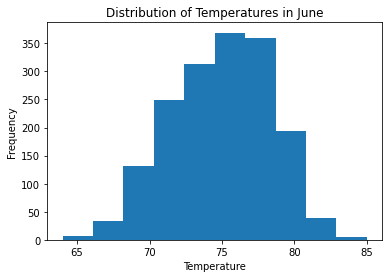

In [17]:
import matplotlib.pyplot as plt
june_temps.plot.hist(bins = 10)
plt.title("Distribution of Temperatures in June")
plt.xlabel("Temperature")

Text(0.5, 0, 'Temperature')

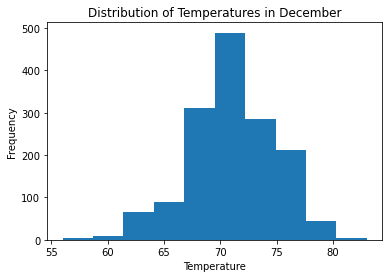

In [18]:
dec_temps.plot.hist(bins = 10)
plt.title("Distribution of Temperatures in December")
plt.xlabel("Temperature")

In [ ]:
stats.ttest_ind(june_temps, dec_temps, equal_var = False, alternative = 'two-sided')

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)

### Analysis

There is statistical evidence that the average temperature in June is different than the average temperature in December. An unpaired two-sided t-test was run with the assumption of unequal variance and returned a pvalue = 4.19e-187. A paired test would be inappropriate in this instance because there is not a one-to-one relationship between the dates in June for which we have data and those in December. More temperatures were recorded in June over the same time period (1700) than December (1517).